In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [2]:
data = pd.read_csv("flight_final.csv")
data.head()

,Unnamed: 0,Airlines,Departure_Time,Route,Arrival_Time,Flight_Duration,Total_Stops,Price
0,0,GO FIRST,10:40,DEL–GOI,1:20,2hr 40min,Nonstop,"₹15,984"
1,1,SpiceJet,12:05,DEL–GOI,2:25,2hr 20min,Nonstop,"₹16,383"
2,2,IndiGo,12:25,DEL–GOI,2:50,2hr 25min,Nonstop,"₹16,383"
3,3,Vistara,11:10,DEL–GOI,1:50,2hr 40min,Nonstop,"₹17,040"
4,4,GO FIRST,5:25,DEL–GOI,5:25,12hr,1 stop,"₹16,246"


In [3]:
data.shape

(1720, 8)

In [4]:
data.isnull().sum()

Unnamed: 0         0
Airlines           0
Departure_Time     0
Route              0
Arrival_Time       0
Flight_Duration    0
Total_Stops        0
Price              0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1720 entries, 0 to 1719
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       1720 non-null   int64 
 1   Airlines         1720 non-null   object
 2   Departure_Time   1720 non-null   object
 3   Route            1720 non-null   object
 4   Arrival_Time     1720 non-null   object
 5   Flight_Duration  1720 non-null   object
 6   Total_Stops      1720 non-null   object
 7   Price            1720 non-null   object
dtypes: int64(1), object(7)
memory usage: 107.6+ KB


In [6]:
# dropping columns

data =data.drop(['Unnamed: 0','Route'],axis =1)
data.head()

,Airlines,Departure_Time,Arrival_Time,Flight_Duration,Total_Stops,Price
0,GO FIRST,10:40,1:20,2hr 40min,Nonstop,"₹15,984"
1,SpiceJet,12:05,2:25,2hr 20min,Nonstop,"₹16,383"
2,IndiGo,12:25,2:50,2hr 25min,Nonstop,"₹16,383"
3,Vistara,11:10,1:50,2hr 40min,Nonstop,"₹17,040"
4,GO FIRST,5:25,5:25,12hr,1 stop,"₹16,246"


In [7]:
data['Airlines'].value_counts()

IndiGo                 560
Air India              370
Vistara                330
GO FIRST               210
SpiceJet               140
AirAsia (India)         90
Emirates, Air India     20
Name: Airlines, dtype: int64

In [8]:
data['Departure_Time'].value_counts()

8:00     100
7:00      80
5:55      60
10:00     50
10:45     50
        ... 
1:15      10
5:30      10
1:50      10
5:20      10
4:50      10
Name: Departure_Time, Length: 78, dtype: int64

In [9]:
data['Arrival_Time'].value_counts()

6:20     110
2:05     110
12:45    110
7:50     110
2:35      80
        ... 
 2:25     10
 9:30     10
 7:45     10
 12:5     10
 3:50     10
Name: Arrival_Time, Length: 71, dtype: int64

In [10]:
data['Flight_Duration'].value_counts()

2hr 35min     50
2hr 40min     40
11hr 10min    40
8hr 20min     40
7hr 55min     30
              ..
15hr 50min    10
14hr 50min    10
20hr 20min    10
21hr 20min    10
11hr          10
Name: Flight_Duration, Length: 120, dtype: int64

In [11]:
data['Total_Stops'].value_counts()

1 stop     1460
Nonstop     160
2 stops     100
Name: Total_Stops, dtype: int64

In [12]:
data['Price'].value_counts()

₹22,044     130
₹27,140     120
₹23,094     110
₹39,005      90
₹27,434      60
           ... 
₹22,725      10
₹22,756      10
₹22,869      10
₹23,247      10
₹216,855     10
Name: Price, Length: 81, dtype: int64

In [13]:
# seperating hours and minutes 

data['Departure_min'] =pd.to_datetime(data['Departure_Time']).dt.minute
data['Departure_hour']=pd.to_datetime(data['Departure_Time']).dt.hour
data =data.drop(['Departure_Time'],axis =1)
data.head()

,Airlines,Arrival_Time,Flight_Duration,Total_Stops,Price,Departure_min,Departure_hour
0,GO FIRST,1:20,2hr 40min,Nonstop,"₹15,984",40,10
1,SpiceJet,2:25,2hr 20min,Nonstop,"₹16,383",5,12
2,IndiGo,2:50,2hr 25min,Nonstop,"₹16,383",25,12
3,Vistara,1:50,2hr 40min,Nonstop,"₹17,040",10,11
4,GO FIRST,5:25,12hr,1 stop,"₹16,246",25,5


In [14]:
# seperating hours and minutes 

data['Arrival_min'] =pd.to_datetime(data['Arrival_Time'], errors = 'coerce').dt.minute
data['Arrival_hour']=pd.to_datetime(data['Arrival_Time'], errors = 'coerce').dt.hour
data =data.drop(['Arrival_Time'],axis =1)
data.head()

,Airlines,Flight_Duration,Total_Stops,Price,Departure_min,Departure_hour,Arrival_min,Arrival_hour
0,GO FIRST,2hr 40min,Nonstop,"₹15,984",40,10,NaN,NaN
1,SpiceJet,2hr 20min,Nonstop,"₹16,383",5,12,NaN,NaN
2,IndiGo,2hr 25min,Nonstop,"₹16,383",25,12,NaN,NaN
3,Vistara,2hr 40min,Nonstop,"₹17,040",10,11,NaN,NaN
4,GO FIRST,12hr,1 stop,"₹16,246",25,5,25.0,5.0


In [15]:
data.isnull().sum()

Airlines             0
Flight_Duration      0
Total_Stops          0
Price                0
Departure_min        0
Departure_hour       0
Arrival_min        360
Arrival_hour       360
dtype: int64

In [16]:
data['Arrival_min'].fillna(int(data['Arrival_min'].mean()), inplace=True)
data['Arrival_hour'].fillna(int(data['Arrival_hour'].mean()), inplace=True)
data.head()

,Airlines,Flight_Duration,Total_Stops,Price,Departure_min,Departure_hour,Arrival_min,Arrival_hour
0,GO FIRST,2hr 40min,Nonstop,"₹15,984",40,10,27.0,6.0
1,SpiceJet,2hr 20min,Nonstop,"₹16,383",5,12,27.0,6.0
2,IndiGo,2hr 25min,Nonstop,"₹16,383",25,12,27.0,6.0
3,Vistara,2hr 40min,Nonstop,"₹17,040",10,11,27.0,6.0
4,GO FIRST,12hr,1 stop,"₹16,246",25,5,25.0,5.0


In [17]:
data.isnull().sum()

Airlines           0
Flight_Duration    0
Total_Stops        0
Price              0
Departure_min      0
Departure_hour     0
Arrival_min        0
Arrival_hour       0
dtype: int64

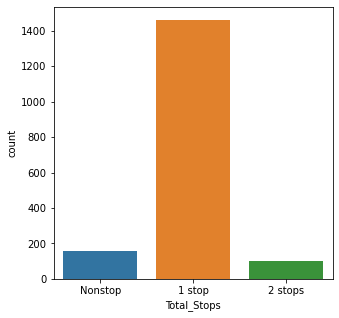

In [18]:
plt.figure(figsize=(5,5))
sns.countplot(data['Total_Stops'])
plt.show()

In [19]:
# replace data with some meaningfull values

data.replace({"Nonstop":0, "1 stop":1, "2 stops":2},inplace =True)
data.head()

,Airlines,Flight_Duration,Total_Stops,Price,Departure_min,Departure_hour,Arrival_min,Arrival_hour
0,GO FIRST,2hr 40min,0,"₹15,984",40,10,27.0,6.0
1,SpiceJet,2hr 20min,0,"₹16,383",5,12,27.0,6.0
2,IndiGo,2hr 25min,0,"₹16,383",25,12,27.0,6.0
3,Vistara,2hr 40min,0,"₹17,040",10,11,27.0,6.0
4,GO FIRST,12hr,1,"₹16,246",25,5,25.0,5.0


In [20]:
# replacing currency symbol and commas

data['Price'] = data['Price'].str.replace(',', '')
data['Price'] = data['Price'].str.replace('₹', '')
data['Price']

0        15984
1        16383
2        16383
3        17040
4        16246
         ...  
1715    145557
1716    146607
1717    209161
1718    209161
1719    216855
Name: Price, Length: 1720, dtype: object

In [21]:
# converting data from float to int

data['Price'] = data['Price'].astype(int)
data['Arrival_min'] = data['Arrival_min'].astype(int)
data['Arrival_hour'] = data['Arrival_hour'].astype(int)

# displaying the datatypes
display(data.dtypes)

Airlines           object
Flight_Duration    object
Total_Stops         int64
Price               int32
Departure_min       int64
Departure_hour      int64
Arrival_min         int32
Arrival_hour        int32
dtype: object

In [22]:
data['Flight_Duration'].value_counts()

2hr 35min     50
2hr 40min     40
11hr 10min    40
8hr 20min     40
7hr 55min     30
              ..
15hr 50min    10
14hr 50min    10
20hr 20min    10
21hr 20min    10
11hr          10
Name: Flight_Duration, Length: 120, dtype: int64

In [23]:
len("11hr 10min".split())

2

In [24]:
duration = list(data['Flight_Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 4:    
        if "hr" in duration[i]:
            duration[i] = duration[i].strip() + " 0min"    # 0m = 0 minute
        else:
            duration[i] = "0hr " + duration[i]             # 0h = 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "hr")[0]))                # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "min")[0].split()[-1]))    # Extracts only minutes from duration

In [25]:
data["Duration_hours"] = duration_hours
data["Duration_mins"] = duration_mins
data =data.drop(['Flight_Duration'],axis =1)
data.head()

,Airlines,Total_Stops,Price,Departure_min,Departure_hour,Arrival_min,Arrival_hour,Duration_hours,Duration_mins
0,GO FIRST,0,15984,40,10,27,6,2,40
1,SpiceJet,0,16383,5,12,27,6,2,20
2,IndiGo,0,16383,25,12,27,6,2,25
3,Vistara,0,17040,10,11,27,6,2,40
4,GO FIRST,1,16246,25,5,25,5,12,0


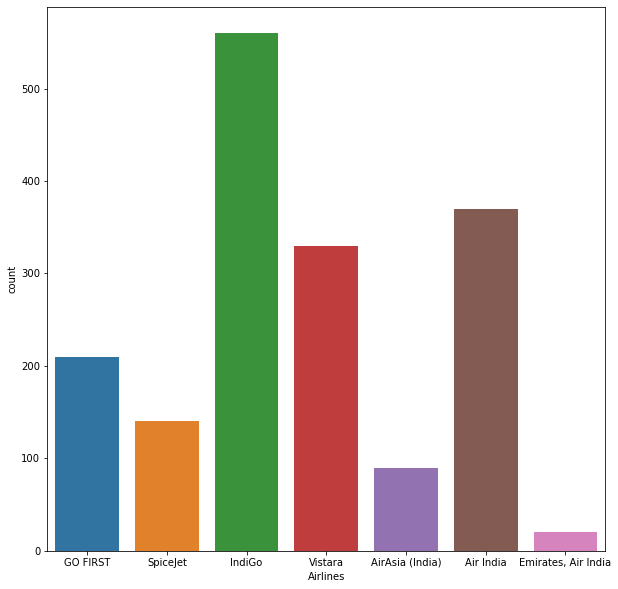

In [26]:
plt.figure(figsize=(10,10))
sns.countplot( x="Airlines" , data = data)
plt.show()

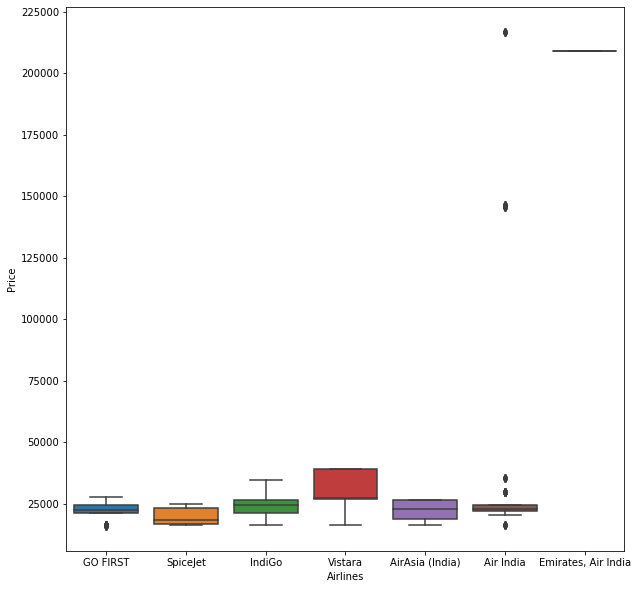

In [27]:
plt.figure(figsize=(10,10))
sns.boxplot( x ="Airlines" , y="Price" ,data =data)
plt.show()

In [28]:
le =LabelEncoder()

data["Airlines"]=le.fit_transform(data["Airlines"])
data.head()

,Airlines,Total_Stops,Price,Departure_min,Departure_hour,Arrival_min,Arrival_hour,Duration_hours,Duration_mins
0,3,0,15984,40,10,27,6,2,40
1,5,0,16383,5,12,27,6,2,20
2,4,0,16383,25,12,27,6,2,25
3,6,0,17040,10,11,27,6,2,40
4,3,1,16246,25,5,25,5,12,0


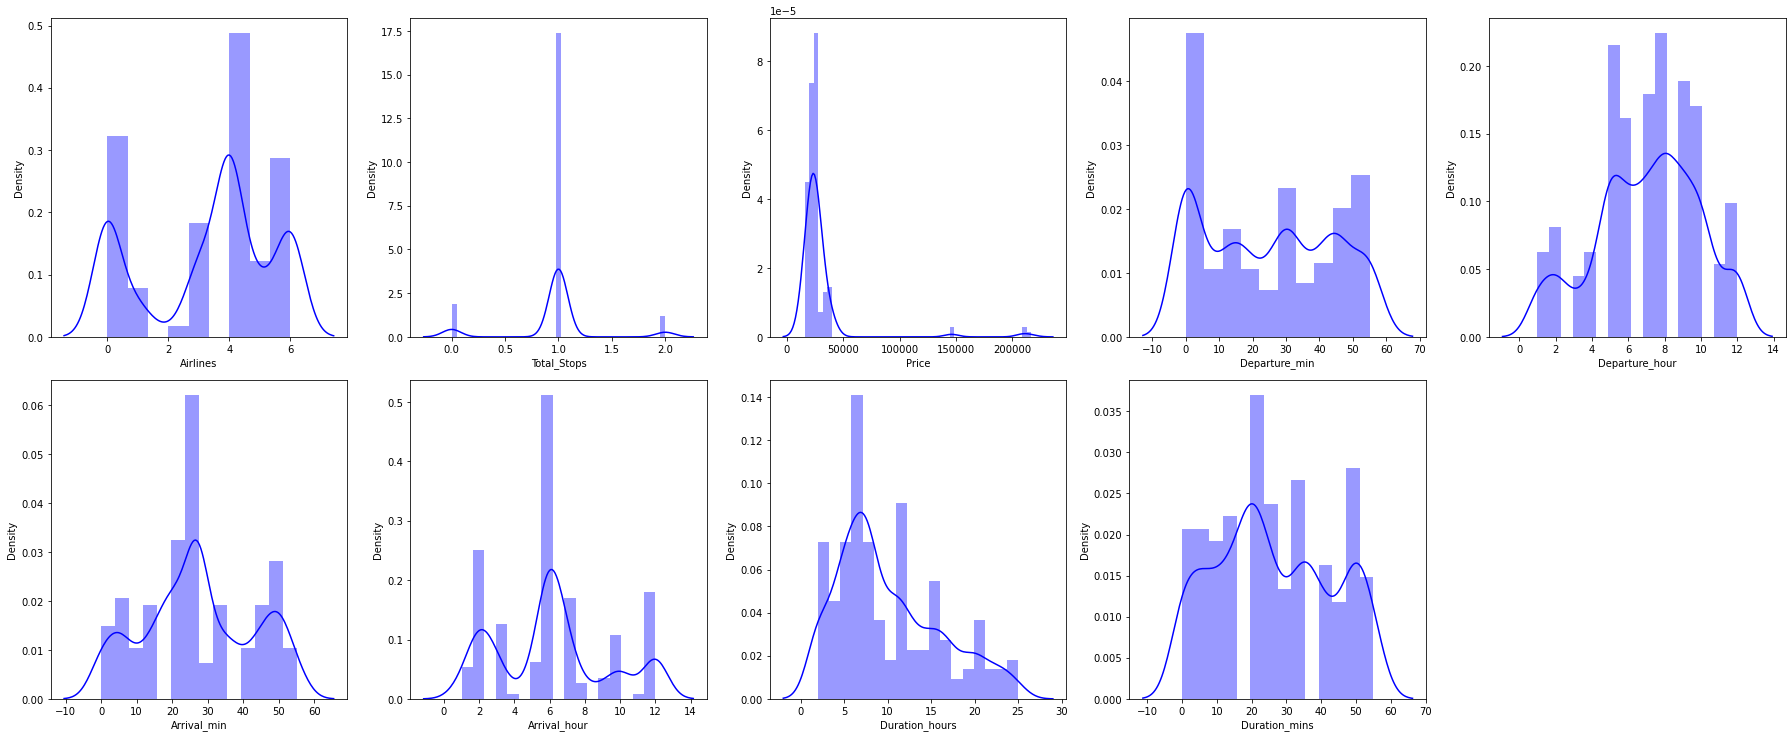

In [29]:
plt.figure(figsize = (25,25))
plotnumber = 1
for col in data.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(data[col] ,color= 'b')
        plt.xlabel(col, fontsize =10)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [30]:
x =data.drop(['Price'], axis =1)
y =data['Price']

In [31]:
sc = StandardScaler()
sc.fit_transform(x)

array([[-0.14342113, -2.49236888,  0.80089615, ..., -0.03109888,
        -1.36857604,  0.82234777],
       [ 0.8053648 , -2.49236888, -1.04638156, ..., -0.03109888,
        -1.36857604, -0.3788736 ],
       [ 0.33097184, -2.49236888,  0.0092057 , ..., -0.03109888,
        -1.36857604, -0.07856826],
       ...,
       [-0.61781409,  0.09008562, -1.31027837, ..., -0.03109888,
         0.99720365,  1.42295846],
       [-0.61781409,  0.09008562, -0.51858793, ..., -0.97504151,
         0.15228233,  0.52204243],
       [-1.56660002,  0.09008562,  1.32868978, ..., -0.97504151,
         0.15228233, -1.58009497]])

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2 ,random_state=5)

In [33]:
# LogisticRegression

lr = LogisticRegression(C=1, max_iter = 1000)

lr.fit(x_train, y_train)
y_predict = lr.predict(x_test)

In [34]:
lr.score(x_test,y_test)

0.9709302325581395

In [35]:
print(" MAE  :",metrics.mean_absolute_error(y_test,y_predict))
print(" MSE  :",metrics.mean_squared_error(y_test,y_predict))
print(" RMSE :",np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

 MAE  : 44.125
 MSE  : 115788.00290697675
 RMSE : 340.276362545177


In [36]:
metrics.r2_score(y_test,y_predict)

0.9998012025337477

In [37]:
# DecisionTree

dt = DecisionTreeRegressor()

dt.fit(x_train, y_train)
y_predict = dt.predict(x_test)

In [38]:
dt.score(x_test,y_test)

1.0

In [39]:
print(" MAE  :",metrics.mean_absolute_error(y_test,y_predict))
print(" MSE  :",metrics.mean_squared_error(y_test,y_predict))
print(" RMSE :",np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

 MAE  : 0.0
 MSE  : 0.0
 RMSE : 0.0


In [40]:
metrics.r2_score(y_test,y_predict)

1.0

In [41]:
# RandomForest

rf = RandomForestRegressor()

rf.fit(x_train, y_train)
y_predict = rf.predict(x_test)

In [42]:
rf.score(x_test,y_test)

0.9999997885926695

In [43]:
print(" MAE  :",metrics.mean_absolute_error(y_test,y_predict))
print(" MSE  :",metrics.mean_squared_error(y_test,y_predict))
print(" RMSE :",np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

 MAE  : 1.9151744186046502
 MSE  : 123.13251802325772
 RMSE : 11.09650927198539


In [44]:
metrics.r2_score(y_test,y_predict)

0.9999997885926695

In [45]:
# KNeighbors

knn = KNeighborsRegressor()

knn.fit(x_train, y_train)
y_predict = knn.predict(x_test)

In [46]:
knn.score(x_test,y_test)

1.0

In [47]:
print(" MAE  :",metrics.mean_absolute_error(y_test,y_predict))
print(" MSE  :",metrics.mean_squared_error(y_test,y_predict))
print(" RMSE :",np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

 MAE  : 0.0
 MSE  : 0.0
 RMSE : 0.0


In [48]:
metrics.r2_score(y_test,y_predict)

1.0